# Dependency usage

This notebook shows the distribution of dependencies by version

In [1]:
data_table_file = "~/Downloads/wqyoY.xlsx"

In [3]:
import pandas as pd
import warnings

# reason behind the warning filter: https://stackoverflow.com/a/66749978
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    df = pd.read_excel(data_table_file,engine="openpyxl")

In [87]:
df_by_gav = df[['version', 'groupId', 'artifactId']].groupby(by = ['version', 'groupId', 'artifactId'])['version'].count().sort_values(ascending=False).reset_index(name='count')
df_by_gav['groupArtifact'] = df_by_gav[['groupId','artifactId']].apply(':\n'.join, axis=1)
df_by_gav = df_by_gav.drop(columns=['groupId', 'artifactId'])
df_by_gav = df_by_gav.set_index(['groupArtifact','version'], drop = True).unstack('version')

array([[<AxesSubplot:ylabel='com.fasterxml.jackson.core:\njackson-annotations'>,
        <AxesSubplot:ylabel='com.fasterxml.jackson.core:\njackson-core'>,
        <AxesSubplot:ylabel='com.fasterxml.jackson.core:\njackson-databind'>],
       [<AxesSubplot:ylabel='com.fasterxml.jackson.dataformat:\njackson-dataformat-avro'>,
        <AxesSubplot:ylabel='com.fasterxml.jackson.dataformat:\njackson-dataformat-cbor'>,
        <AxesSubplot:ylabel='com.fasterxml.jackson.dataformat:\njackson-dataformat-smile'>],
       [<AxesSubplot:ylabel='com.fasterxml.jackson.dataformat:\njackson-dataformat-yaml'>,
        <AxesSubplot:ylabel='com.fasterxml.jackson.datatype:\njackson-datatype-hibernate5-jakarta'>,
        <AxesSubplot:ylabel='com.fasterxml.jackson.datatype:\njackson-datatype-jdk8'>],
       [<AxesSubplot:ylabel='com.fasterxml.jackson.datatype:\njackson-datatype-joda'>,
        <AxesSubplot:ylabel='com.fasterxml.jackson.datatype:\njackson-datatype-jsr310'>,
        <AxesSubplot:ylabel='com.fa

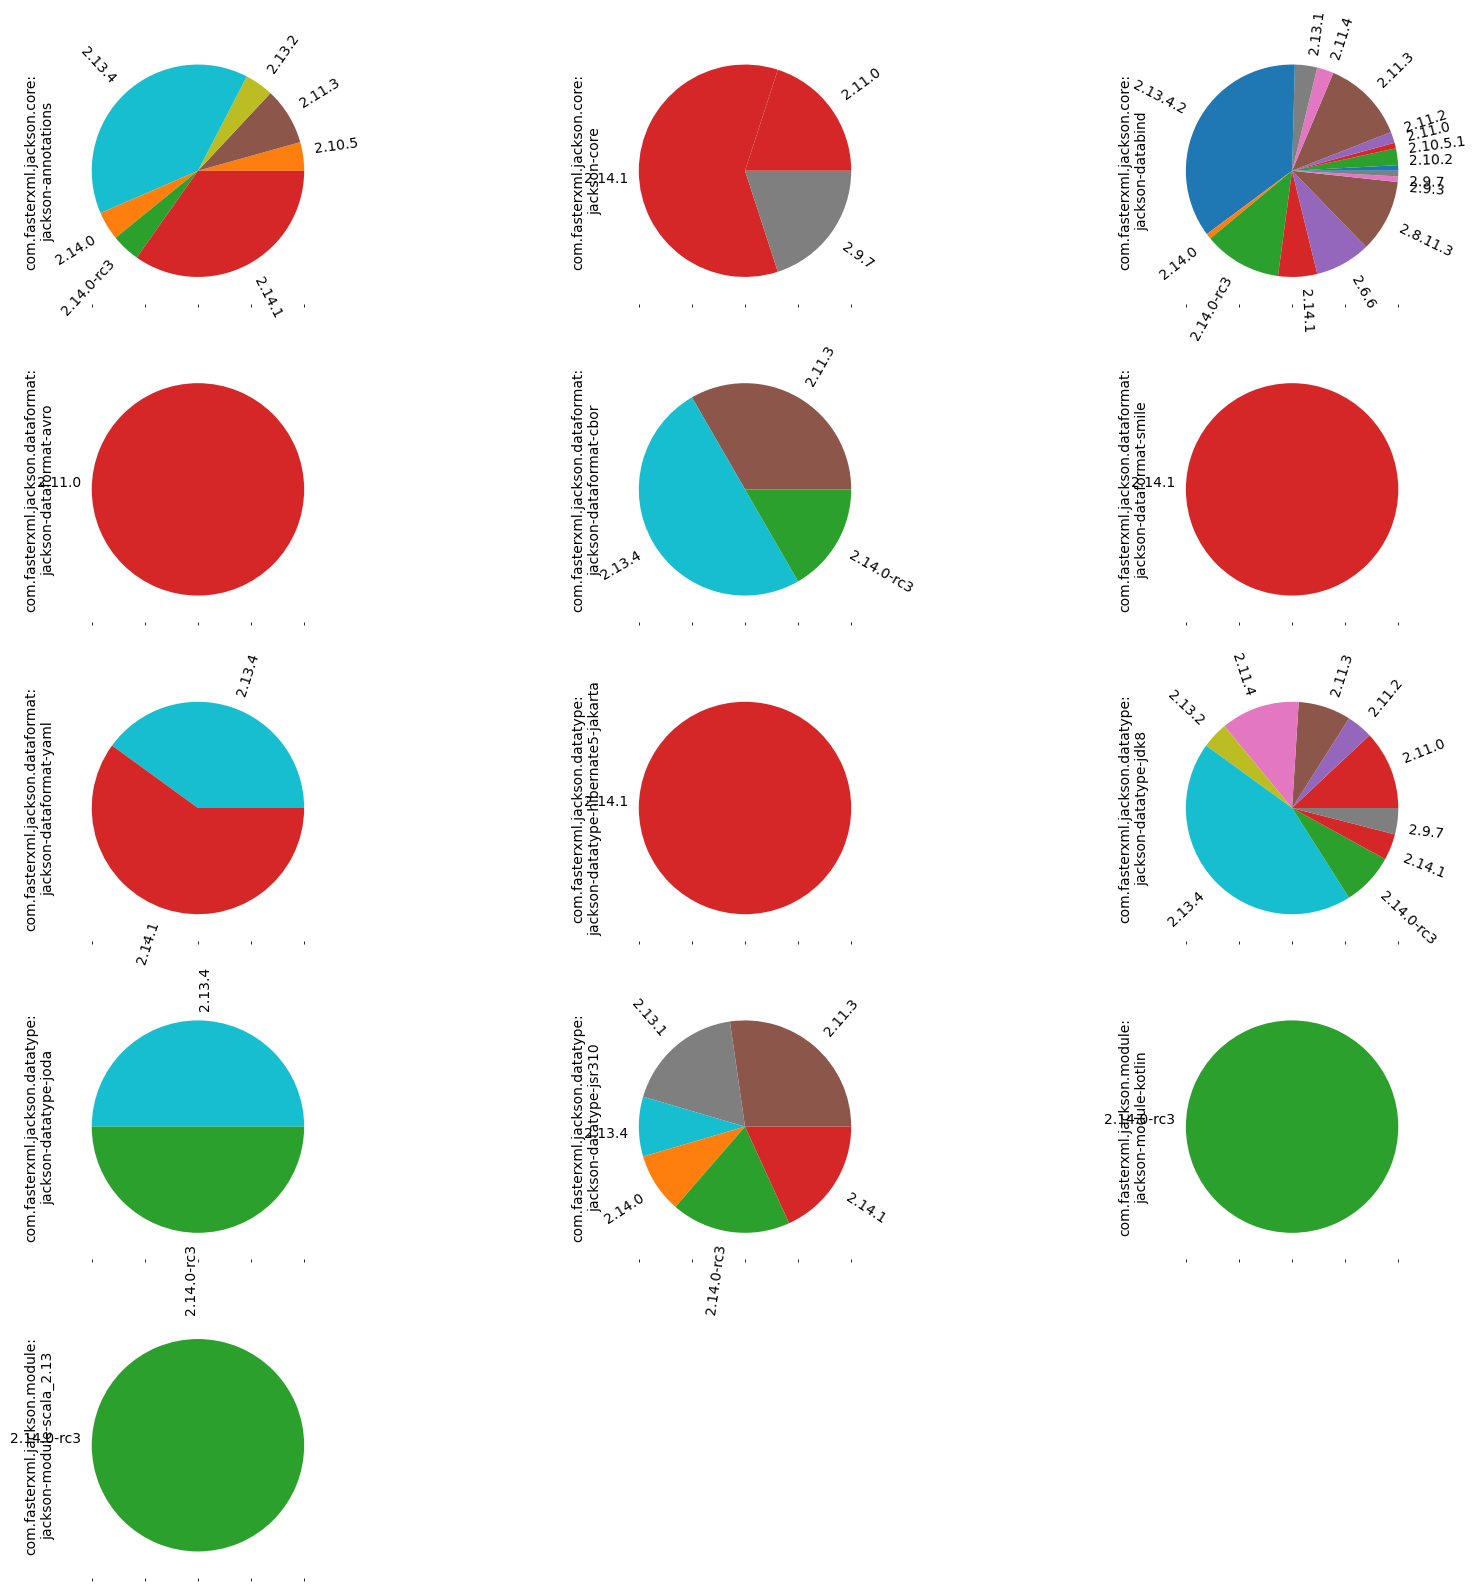

In [98]:
df_by_gav.T.droplevel(0).plot.pie(subplots=True, figsize=(20, 20), layout=(5,3), legend=False, rotatelabels = True)